## Provincial GDP by Industry

This notebook explores gross domestic product [data released by Statistics Canada on 2018-05-02](http://www.statcan.gc.ca/daily-quotidien/180502/dq180502a-eng.htm). The objective is to generate an overview of the 🇨🇦 economy, separated by provinces and industry sectors. The amounts are in `Chained (2007) dollars` (Millions).

Specific Questions I want to understand:

+ What are the top 10 industry sector line items in Canada? 
+ What are the top 10 industry sector line items in each province?

> Author: [J. Colliander](http://colliand.com)  
> Date: 2018-05-03



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [41]:
## The data was downloaded from StatsCan.
## The first 3 rows contain header information that we don't want in the data frame.
## The last 28 rows contain footnotes and information about the data set. We don't want those in the frame.
## skipfooter seemed to require changing the engine from default 'c' to 'python'.
gitems = pd.read_csv('./data/cansim-3790030-eng-4789079444265787071.csv', skiprows = 3, skipfooter = 28, engine='python')

In [42]:
gitems.head(n=10)

,Geography,Value,North American Industry Classification System (NAICS),2013,2014,2015,2016,2017
0,Newfoundland and Labrador,Chained (2007) dollars,"Information and communication technology, manu...",7.9,7.5,6.4,6.6,8.4
1,Newfoundland and Labrador,Chained (2007) dollars,"Information and communication technology, serv...",659.9,669.7,668.3,671.1,676.1
2,Newfoundland and Labrador,Chained (2007) dollars,Crop and animal production [11A] (13),96.0,61.7,93.5,103.5,88.6
3,Newfoundland and Labrador,Chained (2007) dollars,Forestry and logging [113],71.0,74.4,72.0,68.5,69.7
4,Newfoundland and Labrador,Chained (2007) dollars,"Fishing, hunting and trapping [114]",237.0,210.5,203.5,186.0,154.8
5,Newfoundland and Labrador,Chained (2007) dollars,Support activities for agriculture and forestr...,22.0,20.9,22.8,21.2,20.8
6,Newfoundland and Labrador,Chained (2007) dollars,Oil and gas extraction [211],5923.3,5534.6,4677.1,5787.4,6076.8
7,Newfoundland and Labrador,Chained (2007) dollars,Mining and quarrying (except oil and gas) [212],2802.3,2361.2,2810.5,2701.8,2756.6
8,Newfoundland and Labrador,Chained (2007) dollars,Support activities for mining and oil and gas ...,200.5,205.0,193.6,205.9,238.3
9,Newfoundland and Labrador,Chained (2007) dollars,"Electric power generation, transmission and di...",528.0,520.6,560.9,565.5,577.0


In [43]:
## Throw away lines with internal Provincial and territorial totals.
## There may be other internal totals included here.
## TODO Review the footnotes and accompanying information on the data set.
df = gitems.loc[~(gitems['North American Industry Classification System (NAICS)'].str.contains('All industries'))]

In [44]:
df

,Geography,Value,North American Industry Classification System (NAICS),2013,2014,2015,2016,2017
0,Newfoundland and Labrador,Chained (2007) dollars,"Information and communication technology, manu...",7.9,7.5,6.4,6.6,8.4
1,Newfoundland and Labrador,Chained (2007) dollars,"Information and communication technology, serv...",659.9,669.7,668.3,671.1,676.1
2,Newfoundland and Labrador,Chained (2007) dollars,Crop and animal production [11A] (13),96.0,61.7,93.5,103.5,88.6
3,Newfoundland and Labrador,Chained (2007) dollars,Forestry and logging [113],71.0,74.4,72.0,68.5,69.7
4,Newfoundland and Labrador,Chained (2007) dollars,"Fishing, hunting and trapping [114]",237.0,210.5,203.5,186.0,154.8
5,Newfoundland and Labrador,Chained (2007) dollars,Support activities for agriculture and forestr...,22.0,20.9,22.8,21.2,20.8
6,Newfoundland and Labrador,Chained (2007) dollars,Oil and gas extraction [211],5923.3,5534.6,4677.1,5787.4,6076.8
7,Newfoundland and Labrador,Chained (2007) dollars,Mining and quarrying (except oil and gas) [212],2802.3,2361.2,2810.5,2701.8,2756.6
8,Newfoundland and Labrador,Chained (2007) dollars,Support activities for mining and oil and gas ...,200.5,205.0,193.6,205.9,238.3
9,Newfoundland and Labrador,Chained (2007) dollars,"Electric power generation, transmission and di...",528.0,520.6,560.9,565.5,577.0


In [45]:
years = ['2013', '2014','2015', '2016', '2017']

In [46]:
## Total GDP vs Years
for year in years:
    print(year, df[year].sum())

2013 1651662.1
2014 1702241.2
2015 1722884.8
2016 1749041.7
2017 1810391.1


In [47]:
df['Geography'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia (66)', 'Yukon',
       'Northwest Territories', 'Nunavut'], dtype=object)

In [48]:
## long column label.
df = df.rename(columns={'North American Industry Classification System (NAICS)': 'NAICS'})

In [49]:
df.columns

Index(['Geography', 'Value', 'NAICS', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [50]:
## Industry sectors sorted by total value across all provinces and territories
df.groupby(['NAICS']).sum()['2017'].sort_values(ascending=False).head(n=25)

NAICS
Real estate [531]                                                                211081.3
Oil and gas extraction [211]                                                     112790.5
Health care [62X]  (49)                                                          102038.9
Information and communication technology, services [T015]  (11)                   73923.6
Depository credit intermediation and monetary authorities [52B]  (37)             62887.0
Educational services (except universities) [611B]  (47)                           57900.0
Residential building construction [23A]  (20)                                     46072.0
Local, municipal, regional and aboriginal public administration [91A]  (59)       39536.6
Federal government public administration [911]                                    39427.4
Administrative and support services [561]                                         37312.8
Engineering construction [23C]  (20)                                              33773.2
Univ

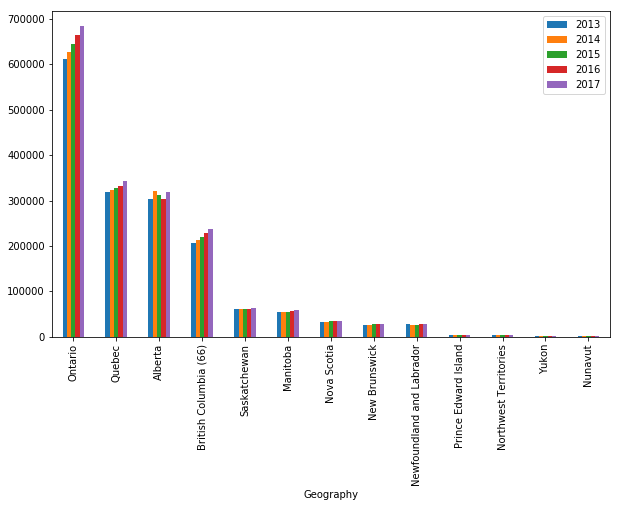

In [51]:
## 2017 GDP vs Provinces
pd.pivot_table(df,index=['Geography'], 
               aggfunc = sum, 
               values = ['2017','2016','2015','2014','2013']).sort_values(by=['2017'], 
                ascending=[False]).plot(kind='bar', figsize=(10,6))

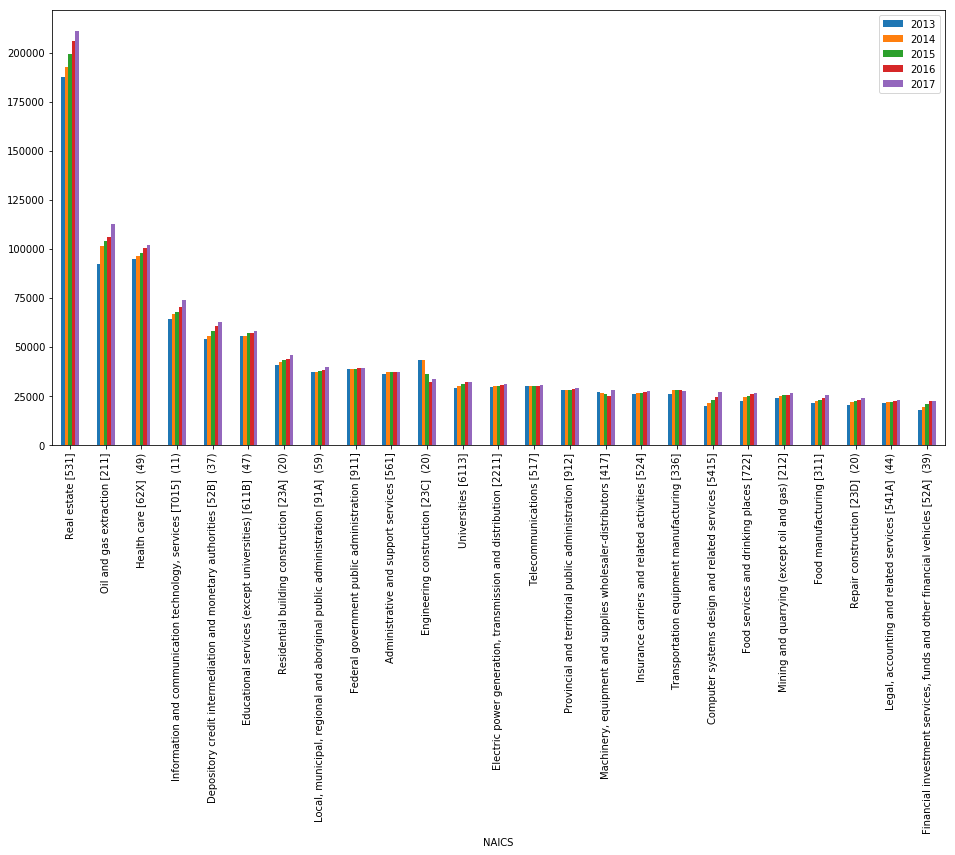

In [52]:
## 2017 Single Largest GDP Sector Sorted
pd.pivot_table(df,index=['NAICS'], 
               aggfunc = sum, values = ['2017','2016','2015','2014','2013']).sort_values(by=['2017'], 
                ascending=[False]).head(n=25).plot(kind='bar', figsize=(16,8))

In [53]:
## 2017 GDP vs Sector separated by Geography and sorted by maximum value
pd.pivot_table(df,index=['Geography', 'NAICS'], 
               aggfunc = max, values = ['2017']).sort_values(by=['2017'], ascending=[False]).head(n=25)

2017
Geography             NAICS                                                      
Alberta               Oil and gas extraction [211]                        88076.7
Ontario               Real estate [531]                                   82537.1
British Columbia (66) Real estate [531]                                   39344.0
Ontario               Health care [62X]  (49)                             37921.0
Quebec                Real estate [531]                                   36320.8
Ontario               Information and communication technology, servi...  33153.6
                      Depository credit intermediation and monetary a...  32935.4
Alberta               Real estate [531]                                   27700.6
Ontario               Educational services (except universities) [611...  23007.8
Quebec                Health care [62X]  (49)                             22248.7
Ontario               Transportation equipment manufacturing [336]        18996.7
                      Federal government public administration [911]      18706.4
                      Administrative and support services [561]           17501.8
                      Residential building construction [23A]  (20)       17269.2
Quebec                Information and communication technology, servi...  15752.5
Ontario               Local, municipal, regional and aboriginal publi...  15511.9
                      Insurance carriers and related activities [524]     14801.4
Alberta               Health care [62X]  (49)                             13779.3
Ontario               Universities [6113]                                 13757.2
                      Computer systems design and related services [5...  13612.8
                      Machinery, equipment and supplies wholesaler-di...  12865.0
British Columbia (66) Health care [62X]  (49)                             12842.3
Quebec                Electric power generation, transmission and dis...  12228.1
                      Educational services (except universities) [611...  12117.2
Ontario               Financial investment services, funds and other ...  11837.2

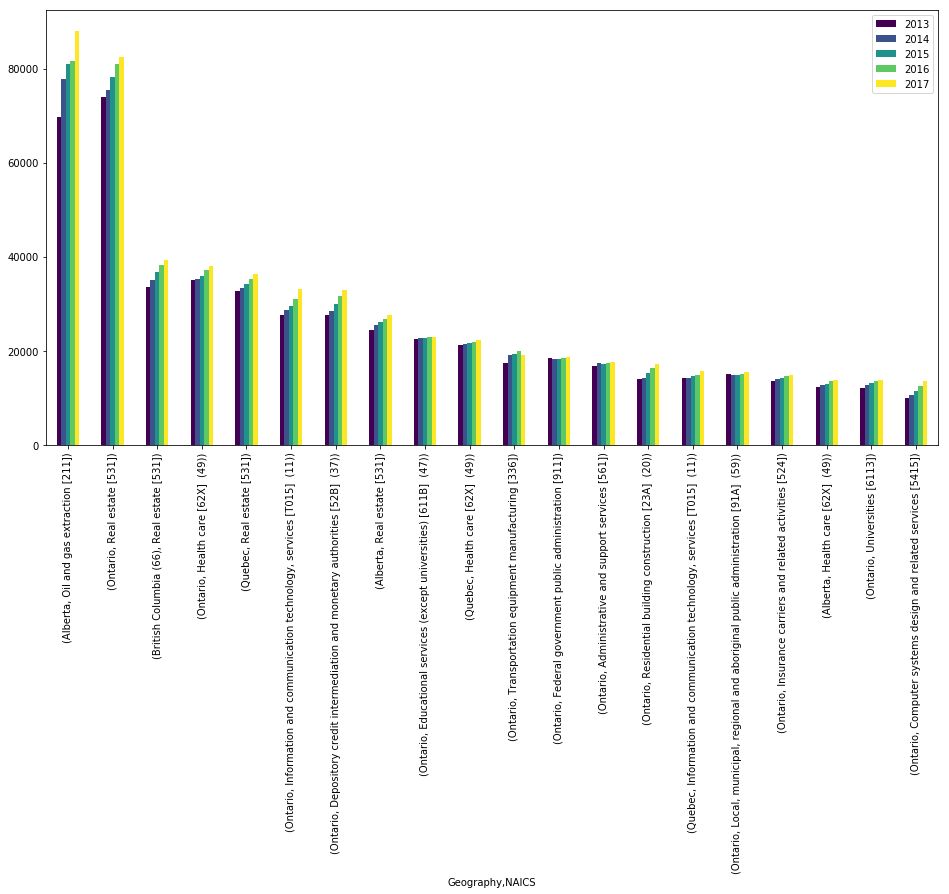

In [54]:
## 2017 Individual Lines Items in the GDP breakdown of Geography X Sector
pd.pivot_table(df,index=['Geography','NAICS'], 
               aggfunc = sum, values = ['2017','2016','2015','2014','2013']).sort_values(by='2017', ascending=False).head(n=20).plot(
                kind='bar', cmap="viridis", figsize=(16, 8))

The GDP from `Alberta, Oil and gas extraction [211]` is comparable to the GDP from `Ontario, Real estate [531]`. The GDP from `British Columbia (66), Real Estate [531]` is about half the size of the contribution from Alberta Oil and Gas and Ontario Real Estate.

## Analyze Provincial GDP across Sectors

In [55]:
df['Geography'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia (66)', 'Yukon',
       'Northwest Territories', 'Nunavut'], dtype=object)

In [56]:
provinces = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia (66)', 'Yukon',
       'Northwest Territories', 'Nunavut']

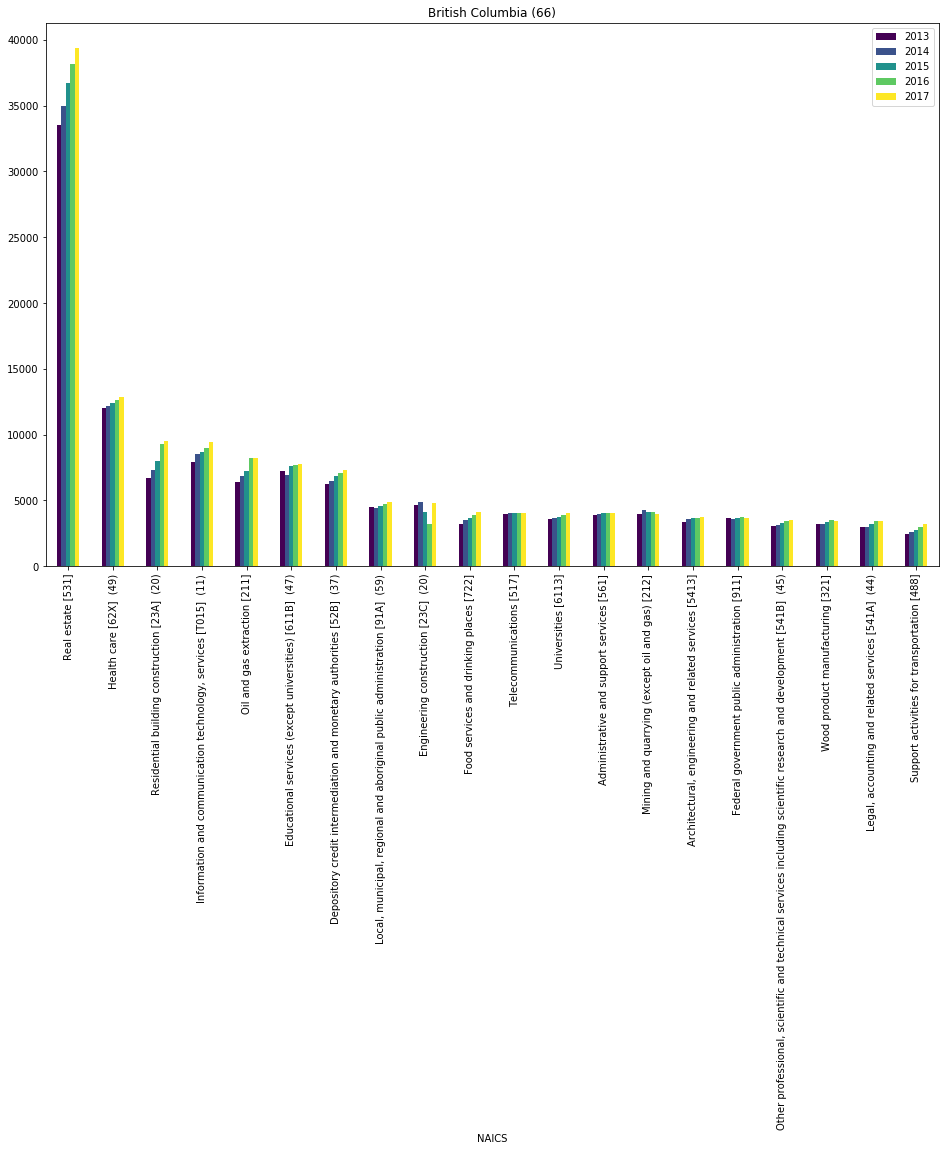

In [57]:
whichprovince = 'British Columbia (66)'
pd.pivot_table(df.loc[df['Geography']== whichprovince],index=['NAICS'], 
               aggfunc = sum, values = ['2017','2016','2015','2014','2013']).sort_values(by='2017', ascending=False).head(n=20).plot(
                kind='bar', cmap="viridis", figsize=(16, 10), title= whichprovince)

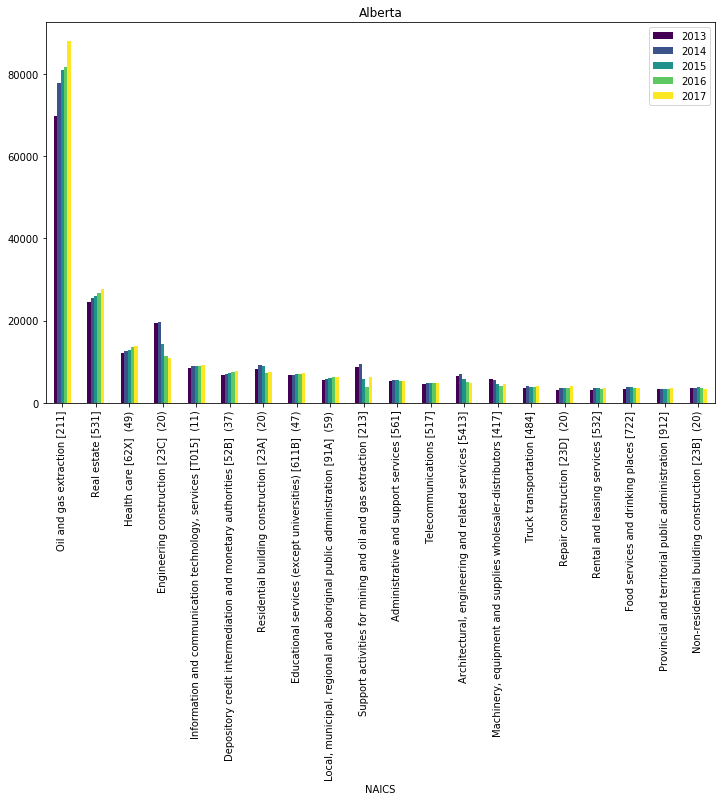

In [58]:
whichprovince = 'Alberta'
pd.pivot_table(df.loc[df['Geography']== whichprovince],index=['NAICS'], 
               aggfunc = sum, values = ['2017','2016','2015','2014','2013']).sort_values(by='2017', ascending=False).head(n=20).plot(
                kind='bar', cmap="viridis", figsize=(12, 7), title= whichprovince)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6399b23b00>], dtype=object)

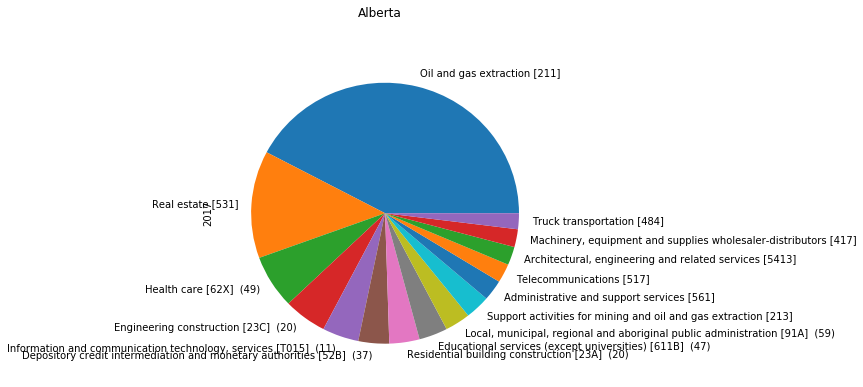

In [59]:
whichprovince = 'Alberta'
pd.pivot_table(df.loc[df['Geography']== whichprovince],index=['NAICS'], 
               aggfunc = sum, values = ['2017']).sort_values(by='2017', ascending=False).head(n=15).plot(
                kind='pie', subplots=True, title= whichprovince, legend=False, figsize=(6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6399a12cc0>], dtype=object)

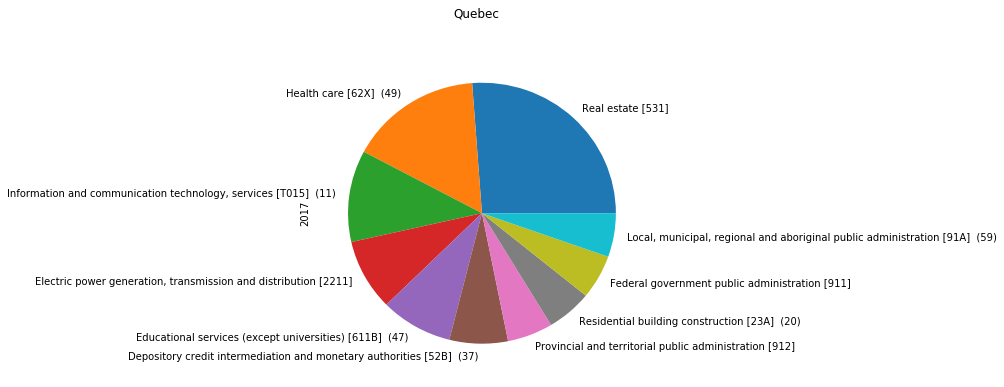

In [60]:
whichprovince = 'Quebec'
pd.pivot_table(df.loc[df['Geography']== whichprovince],index=['NAICS'], 
               aggfunc = sum, values = ['2017']).sort_values(by='2017', ascending=False).head(n=10).plot(
                kind='pie', subplots=True, title= whichprovince, legend=False, figsize=(6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6399a029b0>], dtype=object)

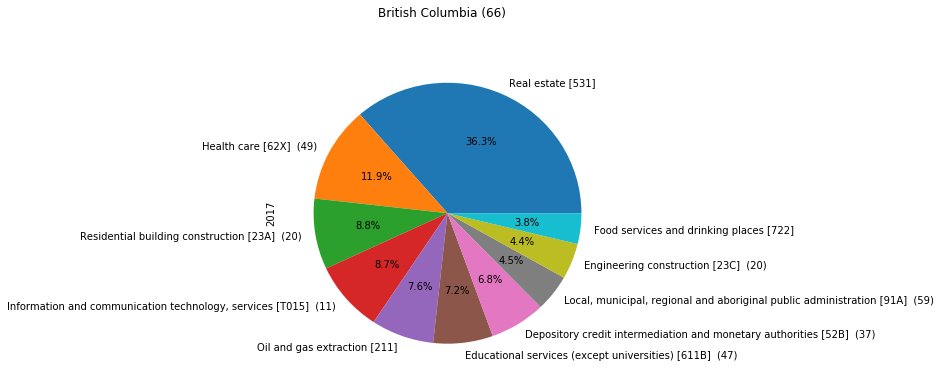

In [61]:
whichprovince = 'British Columbia (66)'
pd.pivot_table(df.loc[df['Geography']== whichprovince],index=['NAICS'], 
               aggfunc = sum, values = ['2017']).sort_values(by='2017', ascending=False).head(n=10).plot(
                kind='pie', subplots=True, 
                title= whichprovince, legend=False, autopct='%1.1f%%', radius=1, figsize =(6,6))

In [62]:
## This code creates a pivot table. Drag the column headings and play with the drop down menus to explore.
from pivottablejs import pivot_ui
pivot_ui(df)